# Job Description skills extraction
---

## Libraries and resources

In [73]:
import pandas as pd

import warnings 
warnings.filterwarnings("ignore")

import nltk
import re 
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.tokenize import RegexpTokenizer

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud 

from collections import Counter

sns.set_theme(palette="muted")

In [74]:
# Download resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hlussiatti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\hlussiatti\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hlussiatti\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hlussiatti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

---
## Load and proceess data

In [ ]:
# Load data
df_description = pd.read_csv('..\\datasets\\1. Original Dataset\\descriptions.csv')

Cleaning, eliminating stopwords, tokenization and lematization

In [77]:
# Tag function for lamatization. Convert POS tags to WordNet format.
def get_wordnet_pos(word):
    
    """Function to map type of words for lematization"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

# Load stopwords and instance lemmatizer.
stopwords = nltk.corpus.stopwords.words('english') 
wordnet_lemmatizer = WordNetLemmatizer()

def process_description(description):    
    if pd.isna(description):
        return []  # desctiption empty
    
    # Cleaning  (if desctiption not null)
    # Eliminate URLs
    description = re.sub(r'http\S+', '', description)
    # Eliminate evreything that is not letters and convert to lower case.
    description = re.sub("[^a-zA-Z]", " ", str(description)).lower()

    # Tokenize the description after eliminate regular conditions
    tokenizer = RegexpTokenizer(r'\w+')
    description = tokenizer.tokenize(description)
    
    # Remove stopwords 
    description = [word for word in description if word not in stopwords]

    # Remove specific not usefull words
    
    
    # Lemmatización
    description = [wordnet_lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in description]
    
    return description


In [78]:
# Aplicar la función de procesamiento a cada reseña
df_description["Processed_Descriptions"] = df_description["Description"].apply(process_description)

In [86]:
df_description["Processed_Descriptions"][1]

['year',
 'old',
 'data',
 'analyst',
 'master',
 'degree',
 'three',
 'year',
 'experience',
 'field',
 'role',
 'involves',
 'collect',
 'processing',
 'analyze',
 'large',
 'datasets',
 'support',
 'inform',
 'decision',
 'make',
 'within',
 'organization',
 'excel',
 'uncover',
 'hidden',
 'pattern',
 'insight',
 'present',
 'finding',
 'clearly',
 'actionably',
 'collaborate',
 'various',
 'department',
 'continuously',
 'learn',
 'contribute',
 'company',
 'success',
 'commit',
 'stay',
 'update',
 'late',
 'trend',
 'technology',
 'data',
 'analytics',
 'continuous',
 'professional',
 'development']

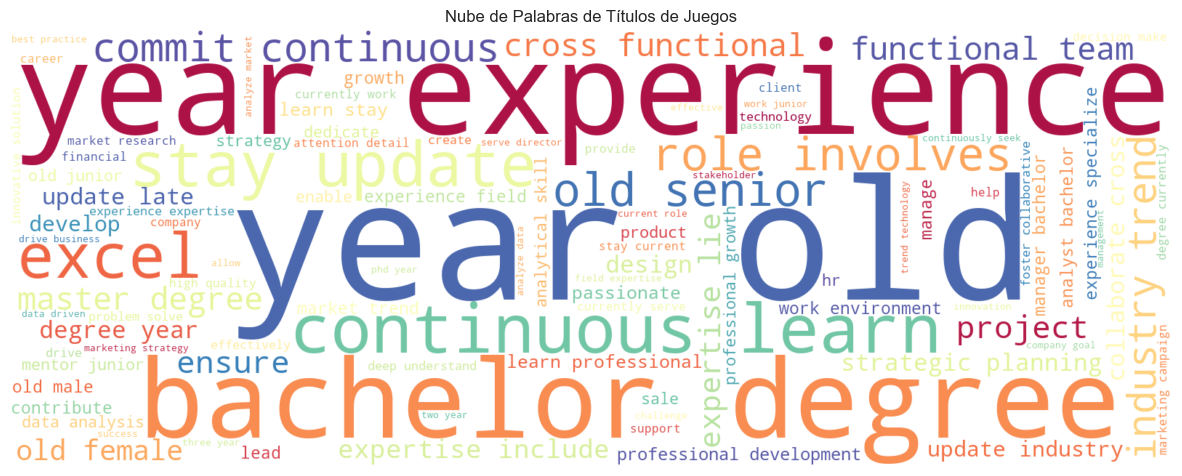

In [80]:
# Concatenar todos los títulos en una sola cadena
df_description["Processed_Descriptions_Text"] = df_description["Processed_Descriptions"].apply(lambda x: ' '.join(x))
text = ' '.join(df_description["Processed_Descriptions_Text"].dropna())
# Crear la nube de palabras
wordcloud = WordCloud(width=1600, height=600, background_color='white', max_words=100, colormap = "Spectral").generate(text)
# Mostrar la nube de palabras
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Títulos de Juegos')
plt.show()

In [ ]:
word_counts = Counter(text.split())
df_word_counts = pd.DataFrame(word_counts.items(), columns=['Word', 'Count']).sort_values(by='Count', ascending=False)
df_word_counts


In [83]:
df_word_counts.head(20)

,Word,Count
0,year,695
11,experience,435
1,old,338
7,degree,319
41,team,313
165,marketing,298
48,data,243
85,trend,230
6,bachelor,221
53,role,220
